In [1]:
import ROOT
import numpy as np
import awkward as ak
import pandas as pd
# import pyarrow as pa
import pickle
import matplotlib.pyplot as plt

# pi_dir="/mnt/d/PKL_pion/"
pion_dir="/mnt/d/PKL_positron/"
p_dir="/mnt/d/PKL_proton/"

In [9]:
df_p=pd.read_pickle(f"{p_dir}proton1.pkl")
# df_pi=pd.read_pickle("/mnt/PKL_pp/PION10000.pkl")
len(df_p)

1000

In [10]:
eergy_list=[]
for i in range(0,999):
    eergy_list.append(np.sum(df_p[i]['total_energy']))
eergy_list=np.array(eergy_list)

print(np.mean(eergy_list))
# plt.hist(eergy_list,bins=100)
   

16252.813386552725


In [11]:
import matplotlib.pyplot as plt


plt.hist(df_p[1:1000]["total_energy"], bins=100, histtype='step', label='pion',range=(0,25))
plt.show()
# import numpy as np
# energy=np.sum(df_p[1:1000]["total_energy"])
# energy

TypeError: list indices must be integers or slices, not str

In [ ]:
df_1000=pd.concat(df_p[1:1000])
energy=df_1000

,x,y,z,total_energy,mean_time
0,50,49,0,5.487479,7.431649
1,50,49,1,0.013556,0.018360
2,50,50,1,0.020749,0.028103
3,49,50,1,6.236333,8.570631
4,49,50,2,5.710468,7.962221
...,...,...,...,...,...
10107,54,54,22,0.868570,0.810639
10108,54,54,21,0.241733,0.076900
10109,49,49,8,0.070444,0.053345
10110,55,44,9,0.830079,0.078090


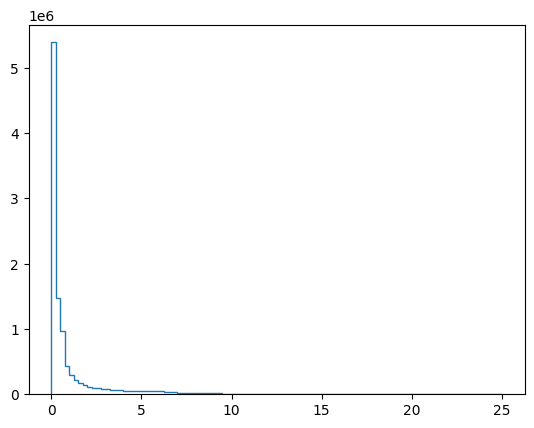

In [29]:
plt.hist(df_1000["total_energy"], bins=100, histtype='step', label='pion',range=(0,25))
plt.show()

In [ ]:
for i in range(1,100):
    df_p=pd.read_pickle(f"{pi_dir}proton{i}.pkl")
    df_pi=pd.read_pickle(f"{p_dir}pion{i}.pkl")
    df_p=[df[df["total_energy"]>20] for df in df_p]
    df_pi=[df[df["total_energy"]>20] for df in df_pi]  
    DF_p=pd.concat(df_p)
    DF_pi=pd.concat(df_pi)
    
    

[        x   y  z  total_energy  average_tdeltae  max_tglob_t  min_tglob_t  \
 0      50  49  0     12.062664        -7.596774     1.374343     1.374202   
 1      50  49  1      1.363640        -0.034091     1.384348     1.374905   
 2      50  50  1     13.458249        -0.384521     1.414373     1.378433   
 3      50  50  2     12.279321       -12.279321     1.454402     1.454402   
 4      50  50  3      7.482576        -7.482576     1.477094     1.477094   
 ...    ..  .. ..           ...              ...          ...          ...   
 37587  41  46  7      0.558823        -0.069853     1.652800     1.651950   
 37588  39  48  7      0.520897        -0.520897     1.680977     1.680844   
 37589  38  45  7      0.259900        -0.215895     1.711588     1.711554   
 37590  49  49  0      0.034394        -0.034394     1.374366     1.374366   
 37591  49  49  1      0.750046        -0.107149     1.376877     1.374725   
 
        time_difference  
 0             0.000141  
 1        

In [4]:
len(df_p),len(df_pi)
#data info: These are lists of dataframes, each dataframe is a single event,that contains the information cell by cell.

(10000, 10000)

In [ ]:
# df_p=[df[df["total_energy"]>100] for df in df_p]
# df_pi=[df[df["total_energy"]>100] for df in df_pi]   #100 MeV cut

df_p=[df[df["total_energy"]>100] for df in df_p]
df_pi=[df[df["total_energy"]>100] for df in df_pi]   #50 MeV cut


In [ ]:
with open("/mnt/PKL_pp/temp/Proton_10000_100mev.pkl","wb") as f:
    pickle.dump(df_p,f)


with open("/mnt/PKL_pp/temp/Pion_10000_100mev.pkl","wb") as f:
    pickle.dump(df_pi,f)

In [2]:
import ROOT
import numpy as np
import awkward as ak
import pandas as pd
import pyarrow as pa
import pickle


with open("/mnt/PKL_pp/temp/Proton_10000_50mev.pkl","rb") as f:
    df_p=pickle.load(f)
with open("/mnt/PKL_pp/temp/Pion_10000_50mev.pkl","rb") as f:
    df_pi=pickle.load(f)

In [3]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

# Filter out empty DataFrames
df_p = [df for df in df_p if len(df) > 0]

# Apply QuantileTransformer and retain column names
# df_p = [pd.DataFrame(StandardScaler().fit_transform(df), 
#                      columns=df.columns, index=df.index) for df in df_p]

# df_p

In [4]:
df_pi = [df for df in df_pi if len(df) > 0]

# # Apply QuantileTransformer and retain column names
# df_pi = [pd.DataFrame(StandardScaler().fit_transform(df), 
#                       columns=df.columns, index=df.index) for df in df_pi]

# df_pi


In [5]:
df__p=[]
for i in range(1,len(df_p)):
    df=df_p[i]
    df_compressed = pd.DataFrame({
        "x": [np.array(df["x"].values)],
        "y": [np.array(df["y"].values)],
        "z": [np.array(df["z"].values)],
        "t": [np.array(df["max_tglob_t"].values)],
        "edep": [np.array(df["average_tdeltae"].values)],
        "total_energy": [np.array(df["total_energy"].values)],
        "time_difference": [np.array(df["time_difference"].values)]
       
    })
    df_compressed["label_proton"] = 1
    df_compressed["label_pion"] = 0
    df__p.append(df_compressed)


In [6]:
DF_p=pd.concat(df__p, ignore_index=True)

In [ ]:
DF_p

,x,y,z,t,edep,total_energy,time_difference,label_proton,label_pion
0,"[50, 50, 49, 49, 48, 48, 48, 47, 47, 50, 48, 5...","[49, 50, 50, 51, 55, 49, 49, 49, 48, 48, 49, 5...","[11, 11, 12, 13, 16, 13, 14, 15, 16, 16, 15, 1...","[24.905060349812395, 175.2538496498471, 1.9447...","[-1545.3100501276936, -2.9272154880035357, -1....","[73.38814457993395, 58.54430976006446, 107.810...","[23.10946088668587, 173.45697138043874, 0.1270...",1,0
1,"[49, 49, 50, 48, 49, 49, 49, 50, 50, 49, 50, 5...","[50, 48, 50, 51, 47, 48, 49, 49, 50, 51, 51, 5...","[3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 4, 5, 2, 3, 4, ...","[1.5469874840316857, 2.0276843040515633, 1.813...","[-977.8824203777282, -4.152735204958533, -1.18...","[254.27632446891005, 95.22314767659346, 68.461...","[0.07217531588753001, 0.5332596815526558, 0.31...",1,0
2,"[50, 49, 50, 49, 47, 50, 49, 49, 49, 49, 48, 5...","[49, 50, 50, 49, 51, 49, 49, 50, 50, 51, 49, 5...","[18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 21, 2...","[2.19050062132646, 2.8122715738736224, 2.67037...","[-356.00608402448654, -10.373349512046127, -7....","[233.59926316156964, 64.07268013546016, 135.33...","[0.12138242346905415, 0.7425597932235015, 0.60...",1,0
3,"[49, 50, 50, 50, 49, 50, 49, 48, 48, 51, 51, 5...","[49, 50, 49, 49, 49, 50, 50, 49, 50, 49, 49, 4...","[12, 12, 13, 14, 14, 14, 14, 14, 15, 14, 15, 1...","[2.011299972350577, 2.012963012250948, 2.06296...","[-26.05159968433672, -43.604262106851955, -3.0...","[93.2217872169216, 96.6962991250199, 105.33582...","[0.19563069546562728, 0.19719366204673072, 0.1...",1,0
4,"[50, 49, 50, 49, 50, 50, 52, 50, 51, 51, 51, 4...","[50, 50, 49, 49, 49, 49, 44, 48, 48, 49, 50, 4...","[13, 13, 13, 13, 14, 15, 22, 17, 24, 24, 24, 1...","[1.9323271993342006, 2.0356524495526296, 2.221...","[-602.0718216601192, -61.38675578423968, -4.50...","[279.3658892689432, 429.1735277823167, 328.411...","[0.0639989825038958, 0.16640091254632172, 0.34...",1,0
...,...,...,...,...,...,...,...,...,...
9977,"[49, 49, 49, 50, 48, 50, 49, 50, 50, 49, 50, 5...","[50, 50, 49, 50, 49, 50, 51, 48, 49, 48, 50, 5...","[5, 6, 6, 6, 7, 5, 6, 12, 6, 7, 11, 11, 7, 8, ...","[1.6594046715410322, 44.370607303769376, 1.884...","[-2.337852471023722, -19.193516551019705, -0.4...","[78.6973264600603, 320.1594542325488, 95.10648...","[0.11997688319091893, 42.79009342094966, 0.305...",1,0
9978,"[50, 50, 49, 49, 48, 47, 49, 50, 50, 51, 50, 4...","[49, 50, 50, 49, 49, 49, 51, 50, 50, 51, 51, 4...","[1, 1, 1, 1, 2, 0, 0, 3, 14, 14, 21, 15, 15, 1...","[1.5028906650439924, 1.467261464484809, 1.4292...","[-6.61114961561485, -388.80693175011146, -85.1...","[58.22982164543114, 182.8772246160372, 75.5524...","[0.1283778582529429, 0.08157270820996354, 0.04...",1,0
9979,"[50, 50, 49, 49, 51, 49, 49, 48, 50, 50, 50, 5...","[49, 50, 51, 49, 50, 50, 51, 52, 49, 49, 49, 4...","[6, 6, 6, 6, 7, 6, 10, 10, 7, 8, 9, 10, 11, 12...","[1.649499093703112, 1.6400428396844808, 1.7017...","[-1037.9982851229581, -164.6899775124721, -3.0...","[209.18320223555497, 178.91616698746282, 55.79...","[0.07144326905202458, 0.061858656034859294, 0....",1,0
9980,"[50, 49, 50, 50, 51, 49, 49, 49, 49, 49, 49, 5...","[49, 48, 49, 49, 49, 49, 49, 50, 50, 49, 51, 5...","[49, 49, 50, 51, 51, 51, 52, 52, 53, 53, 55, 5...","[3.3507629885955392, 3.40198953321852, 121.571...","[-1619.2374476255372, -6.434571767352921, -53....","[240.6457706428718, 51.56878544775575, 265.706...","[0.03199865841761795, 0.06711380973596004, 118...",1,0


In [8]:
df__pi=[]
for i in range(1,len(df_pi)):
    df=df_pi[i]
    df_compressed = pd.DataFrame({
        "x": [np.array(df["x"].values)],
        "y": [np.array(df["y"].values)],
        "z": [np.array(df["z"].values)],
        "t": [np.array(df["max_tglob_t"].values)],
        "edep": [np.array(df["average_tdeltae"].values)],
        "total_energy": [np.array(df["total_energy"].values)],
         "time_difference": [np.array(df["time_difference"].values)]
        # "mean_time": [np.array(df["mean_time"].values)]
    })
    df_compressed["label_proton"] = 0
    df_compressed["label_pion"] = 1
    df__pi.append(df_compressed)

In [9]:
DF_pi=pd.concat(df__pi, ignore_index=True)

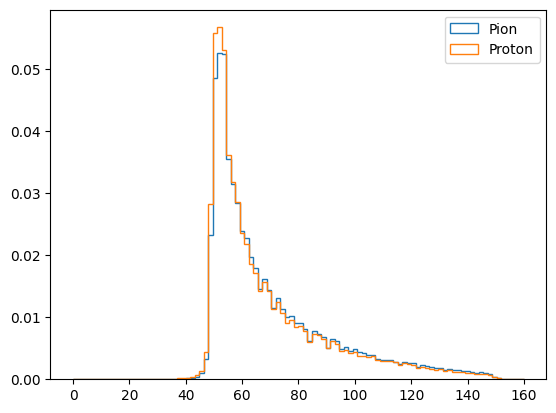

In [11]:
import matplotlib.pyplot as plt
# feature1="time_difference"
feature1="z"
x_p=(DF_p[feature1].values)
y_p=(DF_p["y"].values)
z_p=(DF_p["z"].values)
xyz_p=x_p**2+y_p**2+z_p**2
xyz_p=np.concatenate(xyz_p)
xyz_p=xyz_p**0.5
x_pi=(DF_pi[feature1].values)
y_pi=(DF_pi["y"].values)
z_pi=(DF_pi["z"].values)
xyz_pi=x_pi**2+y_pi**2+z_pi**2
xyz_pi=np.concatenate(xyz_pi)
xyz_pi=xyz_pi**0.5

range=(0,160)
plt.hist(xyz_pi,bins=100,histtype="step",density=True,label="Pion",range=range)
plt.hist(xyz_p,bins=100,histtype="step",density=True,label="Proton",range=range)
plt.legend(loc="upper right")
plt.show()

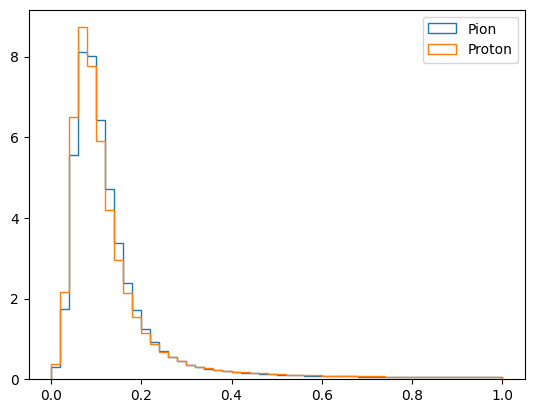

In [11]:
import matplotlib.pyplot as plt
feature2="time_difference"
feature1="total_energy"
x_p=(DF_p[feature2].values)
x_p=np.concatenate(x_p)
x_pi=(DF_pi[feature2].values)
x_pi=np.concatenate(x_pi)
range=(0,1)
plt.hist(x_pi,bins=50,histtype="step",density=True,label="Pion",range=range)
plt.hist(x_p,bins=50,histtype="step",density=True,label="Proton",range=range)
plt.legend(loc="upper right")
plt.show()

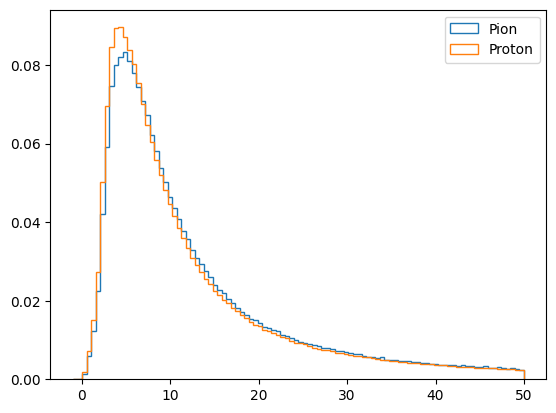

In [15]:
import matplotlib.pyplot as plt
feature1="time_difference"
feature2="total_energy"
x_p=(DF_p[feature2].values)*(DF_p[feature1].values)
x_p=np.concatenate(x_p)
x_pi=(DF_pi[feature2].values)*(DF_pi[feature1].values)
x_pi=np.concatenate(x_pi)
range=(-1,50)
plt.hist(x_pi,bins=100,histtype="step",density=True,label="Pion",range=range)
plt.hist(x_p,bins=100,histtype="step",density=True,label="Proton",range=range)
plt.legend(loc="upper right")
plt.show()

In [13]:
DF_hadron=pd.concat([DF_p,DF_pi], ignore_index=True)

In [14]:
del df_p

del df_pi
import gc
gc.collect()

11547

In [17]:
DF_hadron=DF_hadron.sample(frac=1).reset_index(drop=True)


In [18]:
DF_hadron.to_pickle("/mnt/PKL_pp/temp/pp_20000_50mev.pkl")

In [20]:
import pyarrow as pa
import pandas as pd
DF_hadron=pd.read_pickle("/mnt/PKL_pp/temp/pp_20000_50mev.pkl")
table = pa.Table.from_pandas(DF_hadron)

table

pyarrow.Table
x: list<item: double>
  child 0, item: double
y: list<item: double>
  child 0, item: double
z: list<item: double>
  child 0, item: double
t: list<item: double>
  child 0, item: double
edep: list<item: double>
  child 0, item: double
total_energy: list<item: double>
  child 0, item: double
time_difference: list<item: double>
  child 0, item: double
label_proton: int64
label_pion: int64
----
x: [[[-0.0567986700920343,-0.0567986700920343,0.02700264643719671,0.02700264643719671,0.02700264643719671,...,0.02700264643719671,-0.0567986700920343,-0.0567986700920343,3.2114526745479752,3.9656645233110543],[-0.0127376855020465,-0.0127376855020465,0.14706236897816807,0.14706236897816807,-0.0127376855020465,...,1.26566275033967,3.6626635675428885,-0.0127376855020465,-0.0127376855020465,-0.0127376855020465],...,[0.1506805135137762,-0.21574709889472535,0.1506805135137762,0.1506805135137762,-0.21574709889472535,...,0.5171081259222777,-1.31502993612023,-1.31502993612023,-0.582174711303227,

In [21]:
import awkward as ak
tabel=ak.from_arrow(table)
tabel

<Array [{x: [...], y: [...], z: ..., ...}, ...] type='19942 * {x: option[va...'>

In [22]:
print(ak.type(tabel))

19942 * {x: option[var * ?float64], y: option[var * ?float64], z: option[var * ?float64], t: option[var * ?float64], edep: option[var * ?float64], total_energy: option[var * ?float64], time_difference: option[var * ?float64], label_proton: ?int64, label_pion: ?int64}


In [ ]:
import pickle
with open("/mnt/PKL_pp/temp/PP_20000_50mev.pkl", "wb") as f:
    pickle.dump(tabel, f)

In [25]:
import pickle
with open("/mnt/PKL_pp/temp/PP_20000_50mev.pkl", "rb") as f:
    tabel = pickle.load(f)

In [26]:
tabel

<Array [{x: [...], y: [...], z: ..., ...}, ...] type='19942 * {x: option[va...'>

In [3]:
df_k= pd.read_pickle("/mnt/kaon.pkl")
for i,df in enumerate(df_k):
    df["label_proton"] = 0
    df["label_pion"] = 0
    df["label_kaon"] = 1

In [4]:
df_pi= pd.read_pickle("/mnt/pion.pkl")
for i,df in enumerate(df_pi):
    df["label_proton"] = 0
    df["label_pion"] = 1
    df["label_kaon"] = 0

In [13]:
rdf=ROOT.RDF.FromPandas(df_p[0])

In [ ]:
rdf.Display().Print()

In [ ]:
df_hadron = df_p+df_k+df_pi
import random
random.shuffle(df_hadron)

df_hadron = [df[df['total_energy'] > 20] for df in df_hadron]
df_hadron



In [8]:
tabel=ak.Array(df_hadron)

In [ ]:
del tabel 
import gc
gc.collect()

In [ ]:
df_dict = 
for idx, df in enumerate(df_hadron):
    # Convert each DataFrame to a dictionary of arrays
    df_dict[f"df_{idx}"] = {col: df[col].to_numpy() for col in df.columns}

# Example Output
print("Dictionary containing DataFrames as arrays:")
# for key, value in df_dict.items():
#     print(f"\n{key}:")
#     for col, arr in value.items():
#         print(f"{col}: {arr}")

In [ ]:
del df_dict
import gc
gc.collect()

In [ ]:
from tqdm import tqdm
dict_list = [df.to_dict(orient='records') for df in df_hadron]
for df in tqdm(df_list, desc="Converting DataFrames to dictionaries"):
    dict_list.append(df.to_dict(orient='records'))

In [ ]:
dict_list = [df.to_dict(orient='records') for df in df_hadron]
dict_list

In [74]:
table = ak.from_iter(dict_list)

In [ ]:
print(ak.type(table))

In [ ]:
import awkward as ak



# Extract 3k dictionaries containing arrays
list_of_dictionaries = []
for i,entry in enumerate table:
    # Assuming each entry is a dictionary with arrays
    dict_entry = {key: ak.to_numpy(value) for key, value in entry.items()}
    list_of_dictionaries.append(dict_entry)

# The result is a list of 3k dictionaries
print("List of 3k dictionaries containing arrays:")
for d in list_of_dictionaries[:5]:  # Print the first 5 for demonstration
    print(d)

# If you want to see the total number of dictionaries created
print(f"\nTotal number of dictionaries: {len(list_of_dictionaries)}")


In [ ]:
df_holder["dataframe"][0]

In [34]:
df_p = pd.read_pickle("/mnt/proton.pkl")
# df_p=pd.concat(df_p, ignore_index=True)
# df_p["Label_proton"]=1
# df_p["Label_pion"]=0
# df_p["Label_kaon"]=0


In [22]:
df_pi = pd.read_pickle("/mnt/pion.pkl")
df_pi=pd.concat(df_pi, ignore_index=True)
df_pi["Label_proton"]=0
df_pi["Label_pion"]=1
df_pi["Label_kaon"]=0

In [23]:
df_k = pd.read_pickle("/mnt/kaon.pkl")
df_k=pd.concat(df_k, ignore_index=True)
df_k["Label_proton"]=0
df_k["Label_pion"]=0
df_k["Label_kaon"]=1

In [ ]:
del df_p
del df_k
del df_pi
import gc
gc.collect()

In [ ]:
df_hadron=pd.concat([df_p,df_pi,df_k], ignore_index=True)
df_hadron=df_hadron.sample(frac=1).reset_index(drop=True)
df_hadron

In [ ]:
df_hadron=df_hadron[df_hadron["total_energy"]>20]
df_hadron

In [ ]:
rdf=ROOT.RDF.FromPandas(df_hadron)
columns=rdf.GetColumnNames()
pycol=[str(s) for s in columns]
pycol

In [29]:
tabel=ak.from_rdataframe(rdf,columns=pycol)

In [30]:
with open('/mnt/tabel_20mev.pkl', 'wb') as f:
    pickle.dump(tabel, f)

In [1]:
import pickle
with open('/mnt/PKL/tabel_15000_20mev.pkl', 'rb') as f:
    tabel = pickle.load(f)
tabel

<Array [{x: [50, ...], y: [...], ...}, ...] type='14997 * {x: option[var * ...'>

In [1]:
import os
import pickle

def load_pkl_files(directory):
    # Initialize an empty list to store the combined data
    combined_data = []
    
    # Loop through all files in the given directory
    for filename in os.listdir(directory):
        # Check if the file is a .pkl file
        if filename.endswith('.pkl'):
            file_path = os.path.join(directory, filename)
            try:
                # Open and load the .pkl file
                with open(file_path, 'rb') as f:
                    data = pickle.load(f)
                    # Append the data to the combined list
                    combined_data.extend(data)  # Use extend to merge lists
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    return combined_data

# Specify the directory containing the .pkl files
directory = '/mnt/PKL_pp/PION'  # Change this to your directory path

# Load the data from .pkl files and append to a single list
all_data = load_pkl_files(directory)

# Print the combined data (or do something with it)
print(f"Total items loaded: {len(all_data)}")


Total items loaded: 10000


In [ ]:
import pandas as pd

# Store each DataFrame in the list as a Parquet file
for i, df in enumerate(all_data):
    df.to_parquet(f'/mnt/PQT/pion_{i}.parquet')


In [2]:
import pandas as pd
for i, df in enumerate(all_data):
    df.to_parquet(f'/mnt/PQT/kaon_{i}.parquet')

In [2]:
for i, df in enumerate(all_data):
    df.to_parquet(f'/mnt/PQT/proton_{i}.parquet')

In [2]:
all_data

[        x   y   z  total_energy  average_tdeltae  max_tglob_t  min_tglob_t  \
 0      50  49   0      9.570646        -1.157019     1.364356     1.362857   
 1      49  49   0      4.128665        -4.128665     1.374285     1.374285   
 2      49  49   1     12.273223       -12.273223     1.414313     1.414313   
 3      49  49   2     11.868615       -11.868615     1.454341     1.454341   
 4      49  49   3     12.205351       -12.205351     1.494369     1.494369   
 ...    ..  ..  ..           ...              ...          ...          ...   
 37684  50  52  14      0.288184        -0.343920     1.945691     1.945508   
 37685  49  52  14      1.231241        -0.127293     1.947027     1.945830   
 37686  49  49   7      2.657324        -0.059052     1.622050     1.616721   
 37687  49  50   7      0.173812        -0.013370     1.620855     1.620662   
 37688  50  50   0      0.262109        -0.404121     1.364806     1.364536   
 
        time_difference  
 0             0.001499 

In [3]:
with open('/mnt/PKL_pp/PION10000.pkl', 'wb') as f:
    pickle.dump(all_data, f)